In [175]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [176]:
data = pd.read_csv('diabetes.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


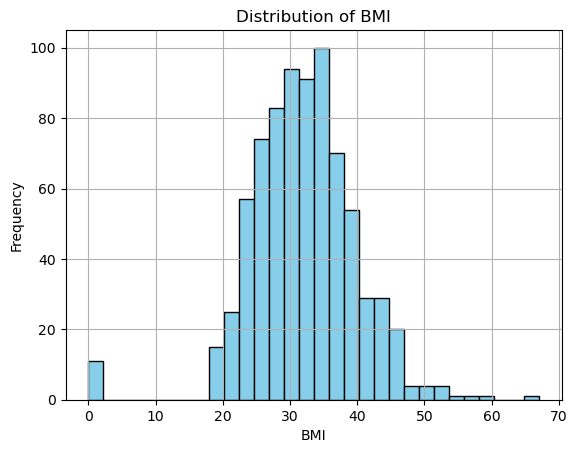

In [177]:
plt.hist(data["BMI"], bins=30, color='skyblue', edgecolor='black')
plt.title("Distribution of BMI")
plt.xlabel("BMI")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

In [178]:
X = data.drop("BMI", axis=1)
y = data["BMI"]

scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1)).flatten()

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_scaled, test_size=0.2, random_state=42
)

In [179]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)  # 회귀이므로 활성화 함수 없음
])

model.compile(optimizer=Adam(learning_rate=0.0001), loss='mse', metrics=['mae'])
model.summary()

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_30 (Dense)                │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,689 (10.50 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

In [180]:
history = model.fit(
    X_train, y_train,
    epochs=200,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

Epoch 1/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.1889 - mae: 0.7821 - val_loss: 0.8929 - val_mae: 0.7822
Epoch 2/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0072 - mae: 0.7505 - val_loss: 0.8695 - val_mae: 0.7709
Epoch 3/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2247 - mae: 0.7898 - val_loss: 0.8453 - val_mae: 0.7589
Epoch 4/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9461 - mae: 0.7300 - val_loss: 0.8275 - val_mae: 0.7497
Epoch 5/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0229 - mae: 0.7479 - val_loss: 0.8096 - val_mae: 0.7397
Epoch 6/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1263 - mae: 0.7518 - val_loss: 0.7948 - val_mae: 0.7313
Epoch 7/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8726 - mae: 0.7038 - val_loss: 0.7813 - val_mae: 0.7242
Epoch 8/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9803 - mae: 0.7271 - val_loss: 0.7705 - val_mae: 0.7183
Epoch 9/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.847

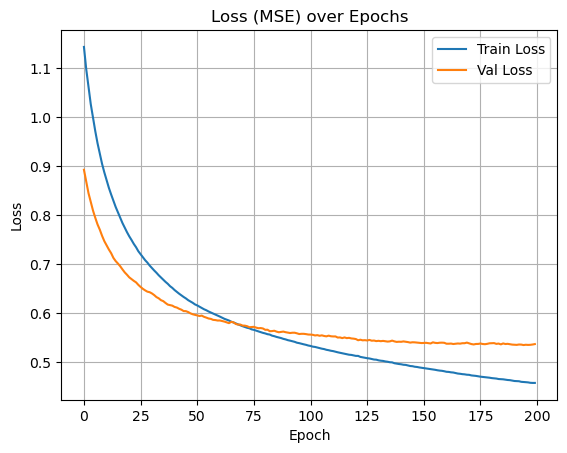

In [181]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Loss (MSE) over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

In [182]:
y_pred_scaled = model.predict(X_test)
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_true = scaler_y.inverse_transform(y_test.reshape(-1, 1))

mse = mean_squared_error(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R² Score: {r2:.4f}")

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
MSE: 48.8299
MAE: 4.9838
R² Score: 0.3131


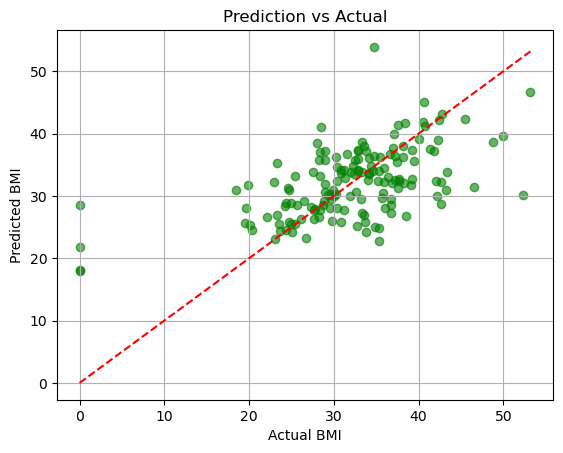

In [183]:
# 9. 예측 vs 실제 시각화
plt.scatter(y_true, y_pred, alpha=0.6, color='green')
plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--')
plt.xlabel("Actual BMI")
plt.ylabel("Predicted BMI")
plt.title("Prediction vs Actual")
plt.grid(True)
plt.show()